In [1]:
import pandas as pd

# Load the dataset
file_path = 'Dataset (ATS)-1 (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values (if any)
data = data.dropna()  # For simplicity, dropping rows with missing values

# Encoding categorical variables
categorical_columns = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split the dataset into training and testing sets
X = data_encoded.drop('MonthlyCharges', axis=1)
y = data_encoded['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Pre-processed Dataset", dataframe=pd.DataFrame(X_train_scaled))

# Display the first few rows of the scaled training data
pd.DataFrame(X_train_scaled).head()


,0,1,2,3,4,5,6,7,8,9
0,-0.437749,-0.465683,-1.025166,1.532186,0.329573,-0.860523,-0.887057,1.910109,-0.558353,-0.601271
1,-0.437749,0.885537,-1.025166,-0.652662,0.329573,1.162083,1.127324,-0.523530,1.790982,-0.601271
2,-0.437749,-1.284605,0.975452,-0.652662,-3.034225,-0.860523,-0.887057,-0.523530,-0.558353,1.663142
3,-0.437749,-1.161766,0.975452,-0.652662,0.329573,-0.860523,1.127324,-0.523530,-0.558353,1.663142
4,-0.437749,-1.325551,0.975452,1.532186,0.329573,1.162083,-0.887057,-0.523530,1.790982,-0.601271


In [3]:
# Create the pre-processed, training, and testing datasets for download
pre_processed_path = 'pre_processed_dataset.csv'
training_set_path = 'training_set.csv'
testing_set_path = 'testing_set.csv'

# Saving the pre-processed dataset
data_encoded.to_csv(pre_processed_path, index=False)

# Saving the training set
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
training_set = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)
training_set.to_csv(training_set_path, index=False)

# Saving the testing set
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
testing_set = pd.concat([X_test_scaled_df, y_test.reset_index(drop=True)], axis=1)
testing_set.to_csv(testing_set_path, index=False)

pre_processed_path, training_set_path, testing_set_path


('pre_processed_dataset.csv', 'training_set.csv', 'testing_set.csv')

In [4]:
# Get the number of samples in the original dataset
total_samples = data_encoded.shape[0]

# Get the number of samples in the training and testing sets
training_samples = X_train.shape[0]
testing_samples = X_test.shape[0]

total_samples, training_samples, testing_samples


(7043, 5634, 1409)

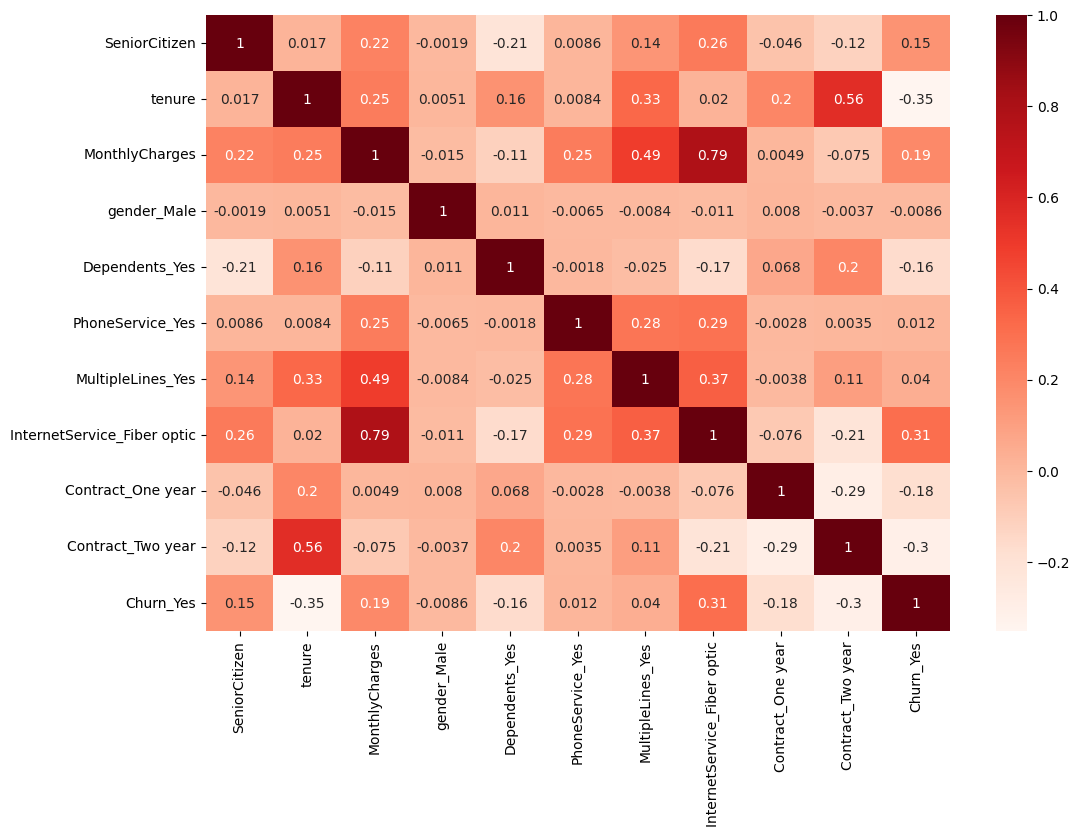

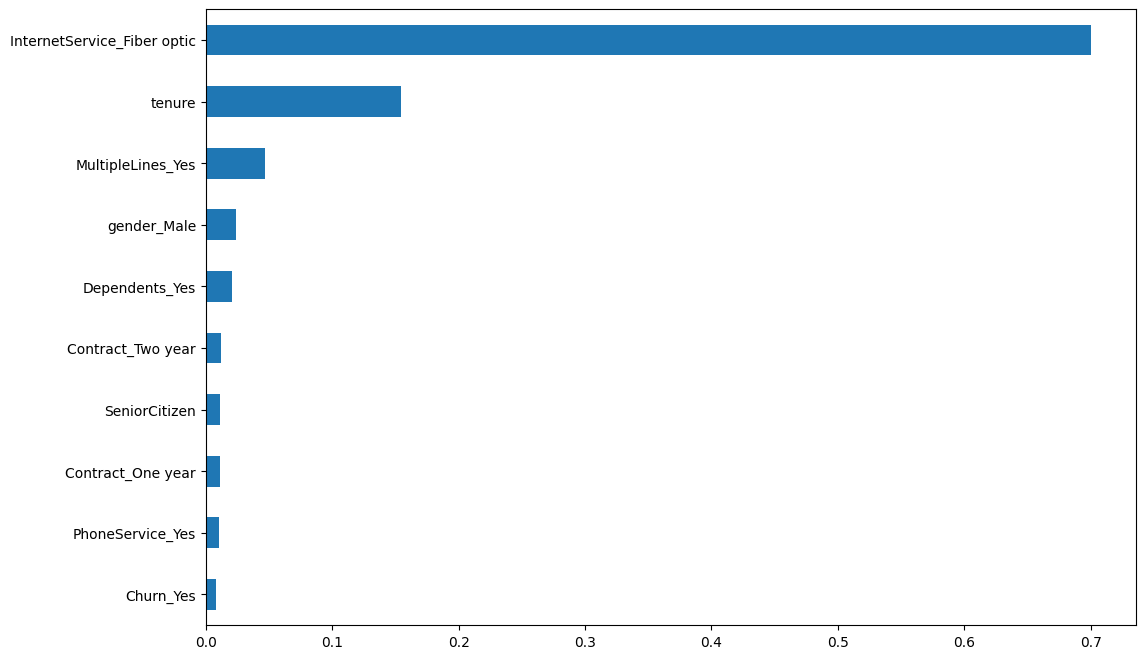

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.437749,-0.465683,-1.025166,1.532186,0.329573,-0.860523,-0.887057,1.910109,-0.558353,0.203853,...,-0.283606,-0.292350,0.629521,-0.184018,0.763333,-1.643693,0.480476,-1.694375,0.495291,-1.066514
1,-0.437749,0.885537,-1.025166,-0.652662,0.329573,1.162083,1.127324,-0.523530,1.790982,-0.387643,...,0.382992,0.371536,-0.172542,0.590260,1.310044,-0.608386,2.081271,-0.590188,2.019017,-0.937634
2,-0.437749,-1.284605,0.975452,-0.652662,-3.034225,-0.860523,-0.887057,-0.523530,-0.558353,0.562335,...,2.611022,2.691530,1.588509,1.694168,0.763333,0.450510,0.480476,0.464401,0.495291,0.292315
3,-0.437749,-1.161766,0.975452,-0.652662,0.329573,-0.860523,1.127324,-0.523530,-0.558353,0.508562,...,-0.283606,0.371536,-0.172542,-0.184018,-0.970088,0.450510,0.480476,-0.590188,-0.629444,0.292315
4,-0.437749,-1.325551,0.975452,1.532186,0.329573,1.162083,-0.887057,-0.523530,1.790982,0.580259,...,0.382992,-0.292350,-0.172542,0.590260,-1.030834,-0.608386,2.081271,0.464401,-1.588703,-0.937634


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# Identify highly correlated features
threshold = 0.75
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
                   if i != j and correlation_matrix.loc[i, j] > threshold]

# Train a RandomForest model to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.sort_values().plot(kind='barh')
plt.show()

# Selecting important features
selected_features = feature_importances[feature_importances > 0.01].index
X_train_selected = X_train_scaled[:, feature_importances > 0.01]
X_test_selected = X_test_scaled[:, feature_importances > 0.01]

#import ace_tools as tools; tools.display_dataframe_to_user(name="Selected Features", dataframe=pd.DataFrame(X_train_selected))

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

#tools.display_dataframe_to_user(name="Polynomial Features", dataframe=pd.DataFrame(X_train_poly))

# Display the first few rows of the generated polynomial features
pd.DataFrame(X_train_poly).head()


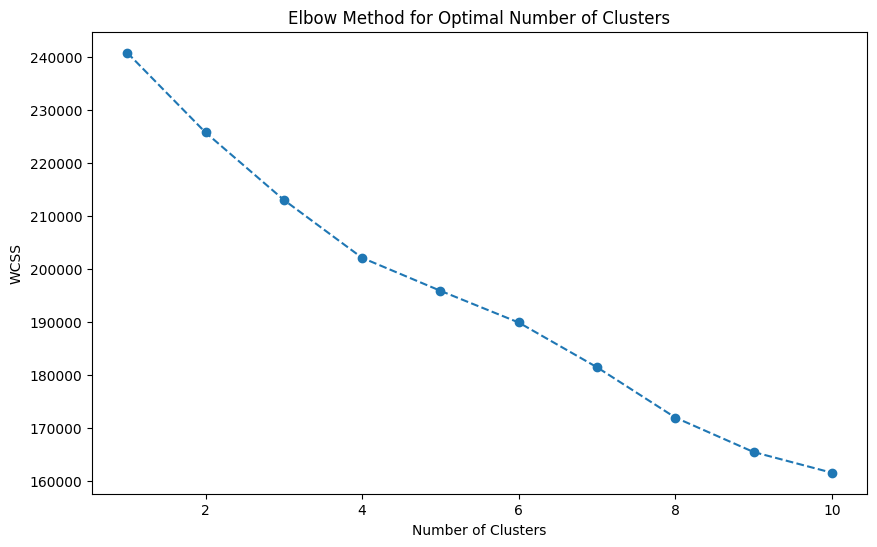

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_poly)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


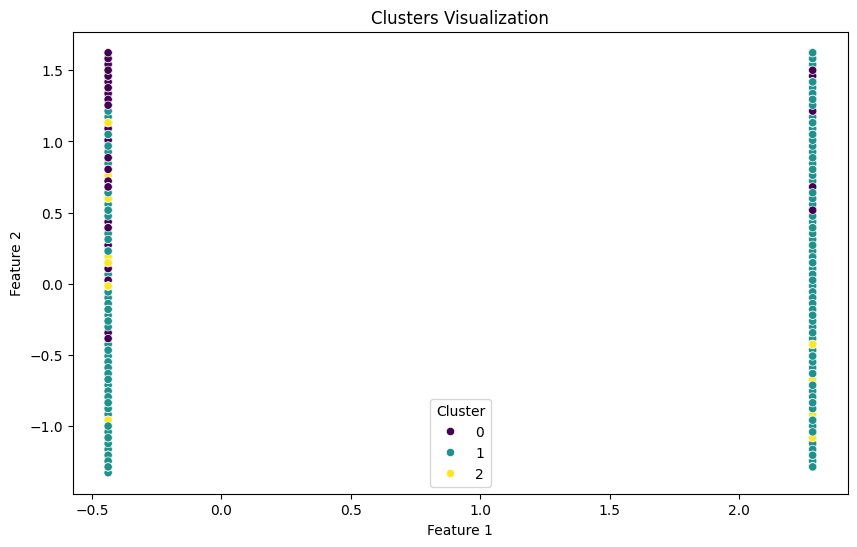

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Train the K-Means clustering model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_train_poly)

# Add the cluster labels to the dataset
X_train_clustered = pd.DataFrame(X_train_poly)
X_train_clustered['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_clustered, x=0, y=1, hue='Cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Clustered Dataset", dataframe=X_train_clustered)


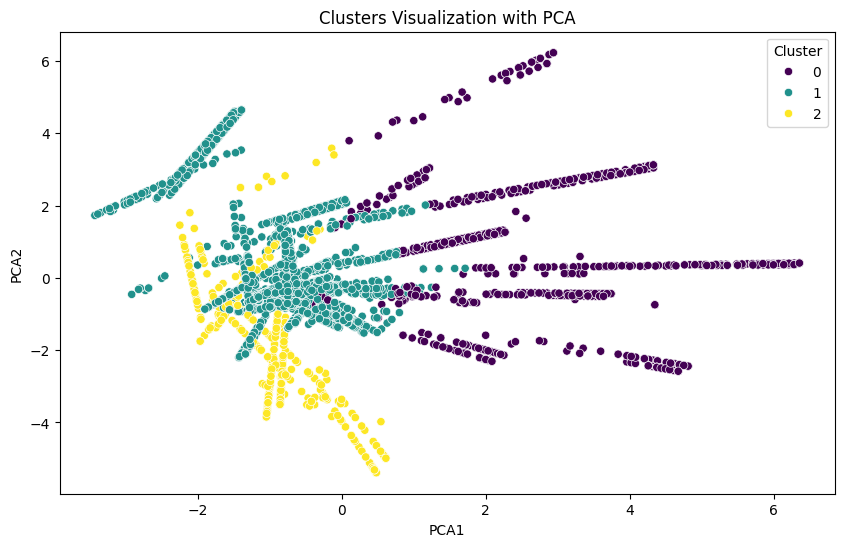

In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_poly)

# Add the cluster labels to the PCA-transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
X_train_pca_df['Cluster'] = clusters

# Visualize the clusters in the PCA-transformed space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


In [9]:
import numpy as np

# Retrieve the centroids of the clusters
centroids = kmeans.cluster_centers_

# No need to apply PCA inverse transform as centroids are already in the original feature space
centroids_df = pd.DataFrame(centroids, columns=[f'Feature{i+1}' for i in range(centroids.shape[1])])

# Add cluster labels
centroids_df['Cluster'] = [0, 1, 2]

centroids_df

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Cluster
0,-0.250586,1.198067,-0.006574,0.423599,0.030959,0.331213,-0.359356,-0.523530,1.790982,-0.252586,...,0.146453,-0.016208,0.055448,0.223687,-0.173400,0.593196,0.188134,-0.643600,-0.937634,0
1,0.068904,-0.306993,-0.003785,-0.110105,0.329573,0.001654,0.201258,0.132074,-0.462283,0.081619,...,0.066329,0.043528,-0.152356,0.367607,0.053460,-0.055330,-0.146276,-0.153024,-0.124039,1
2,0.021994,-0.306358,0.050722,-0.094312,-3.034225,-0.860523,-0.887057,0.152480,-0.427834,0.023549,...,2.691530,-0.462660,1.298145,0.763333,-0.131213,0.368161,-0.135259,0.379513,-0.153468,2


<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


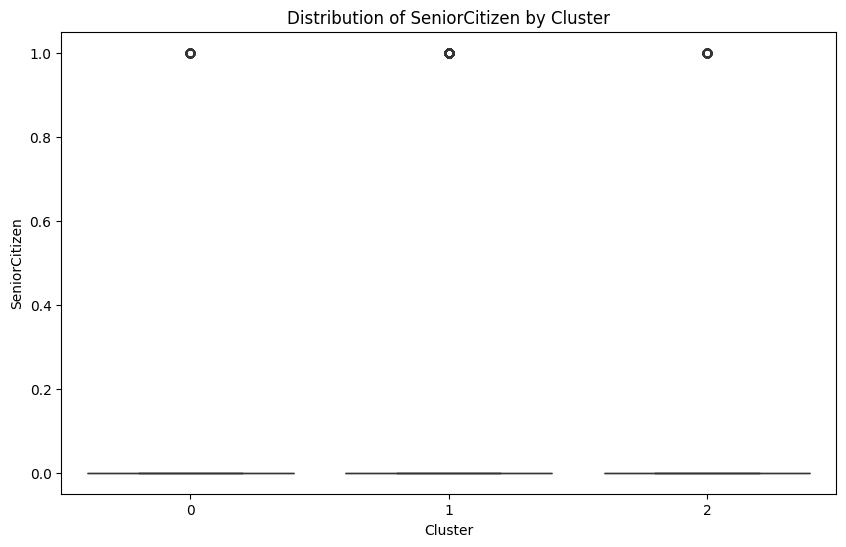

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


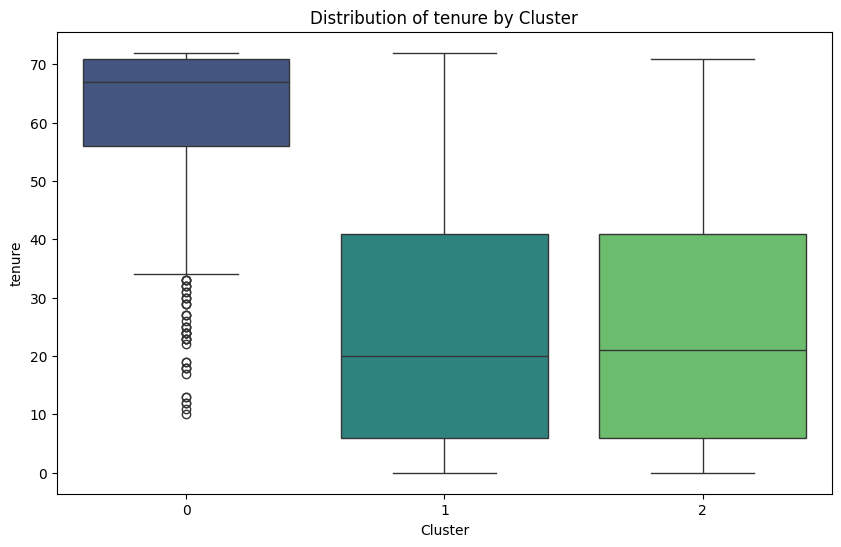

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


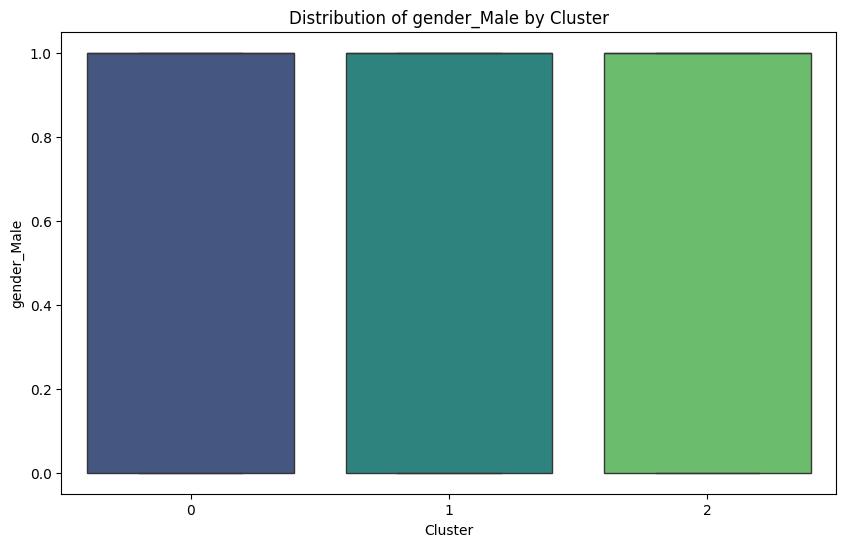

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


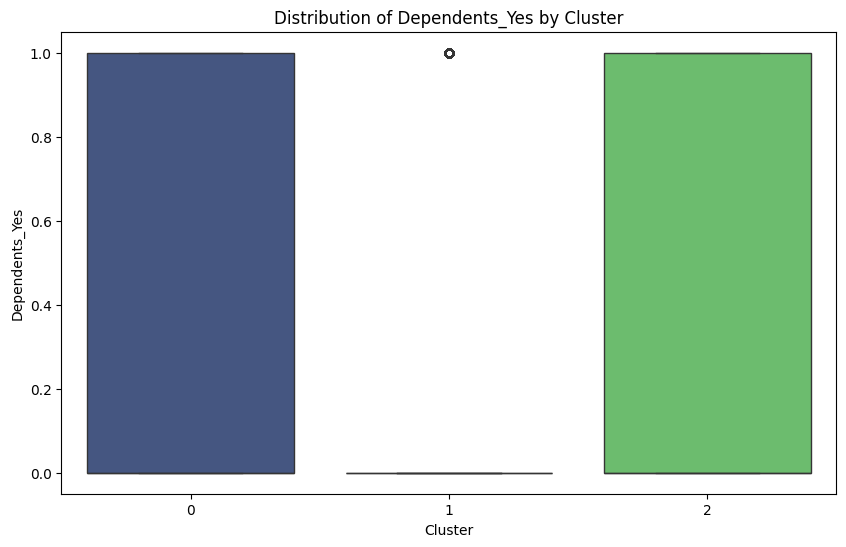

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


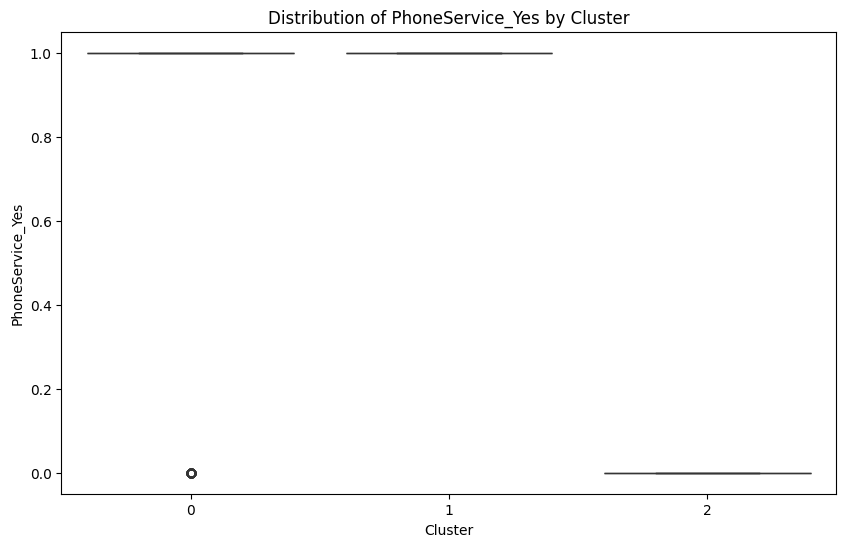

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


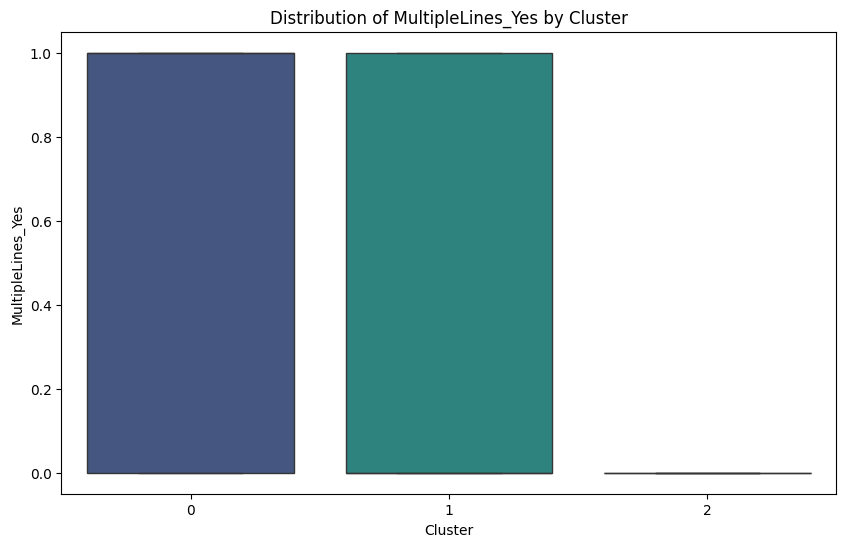

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


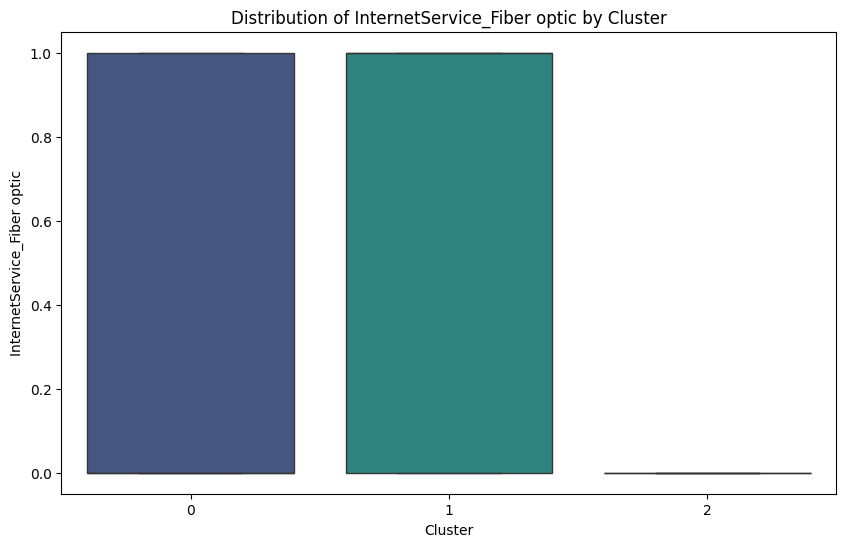

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


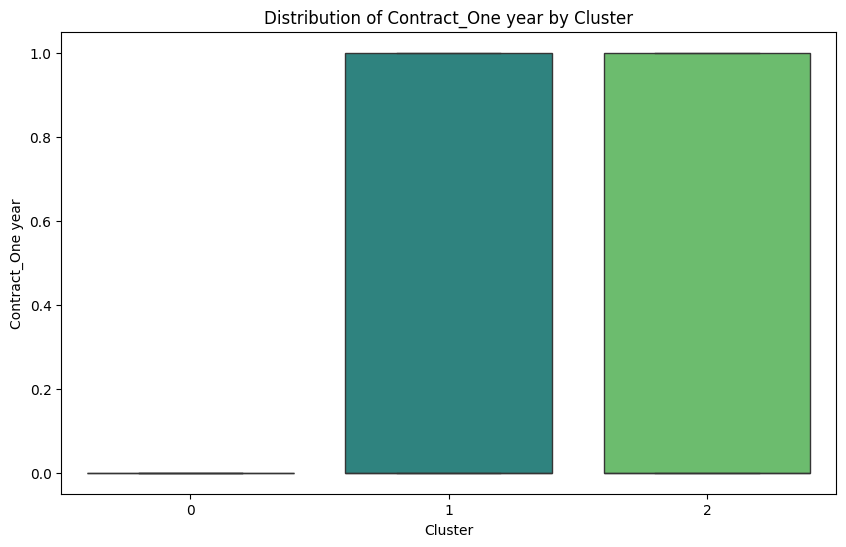

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


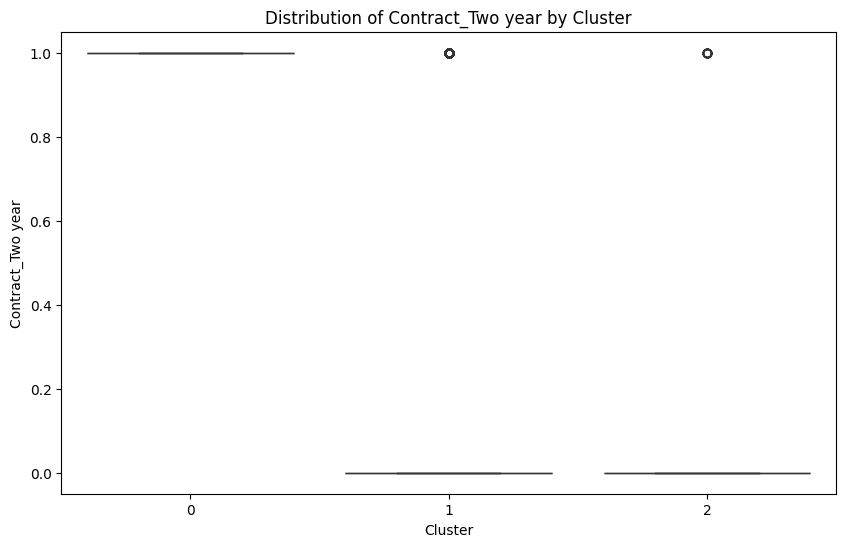

<ipython-input-10-dc6363d7f569>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')


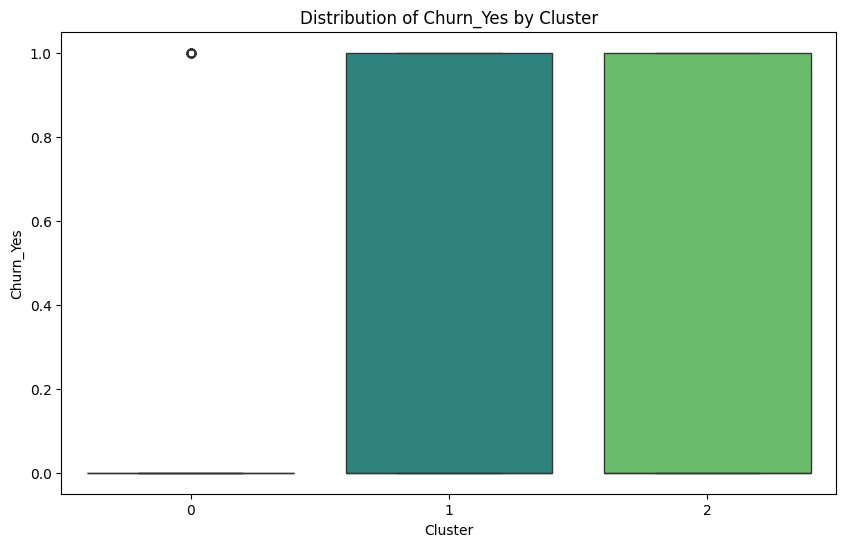

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the original features and cluster labels
X_train_original_df = pd.DataFrame(X_train, columns=X.columns)
X_train_original_df['Cluster'] = clusters

# Visualize the distribution of key features within each cluster
for feature in X_train_original_df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=X_train_original_df, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


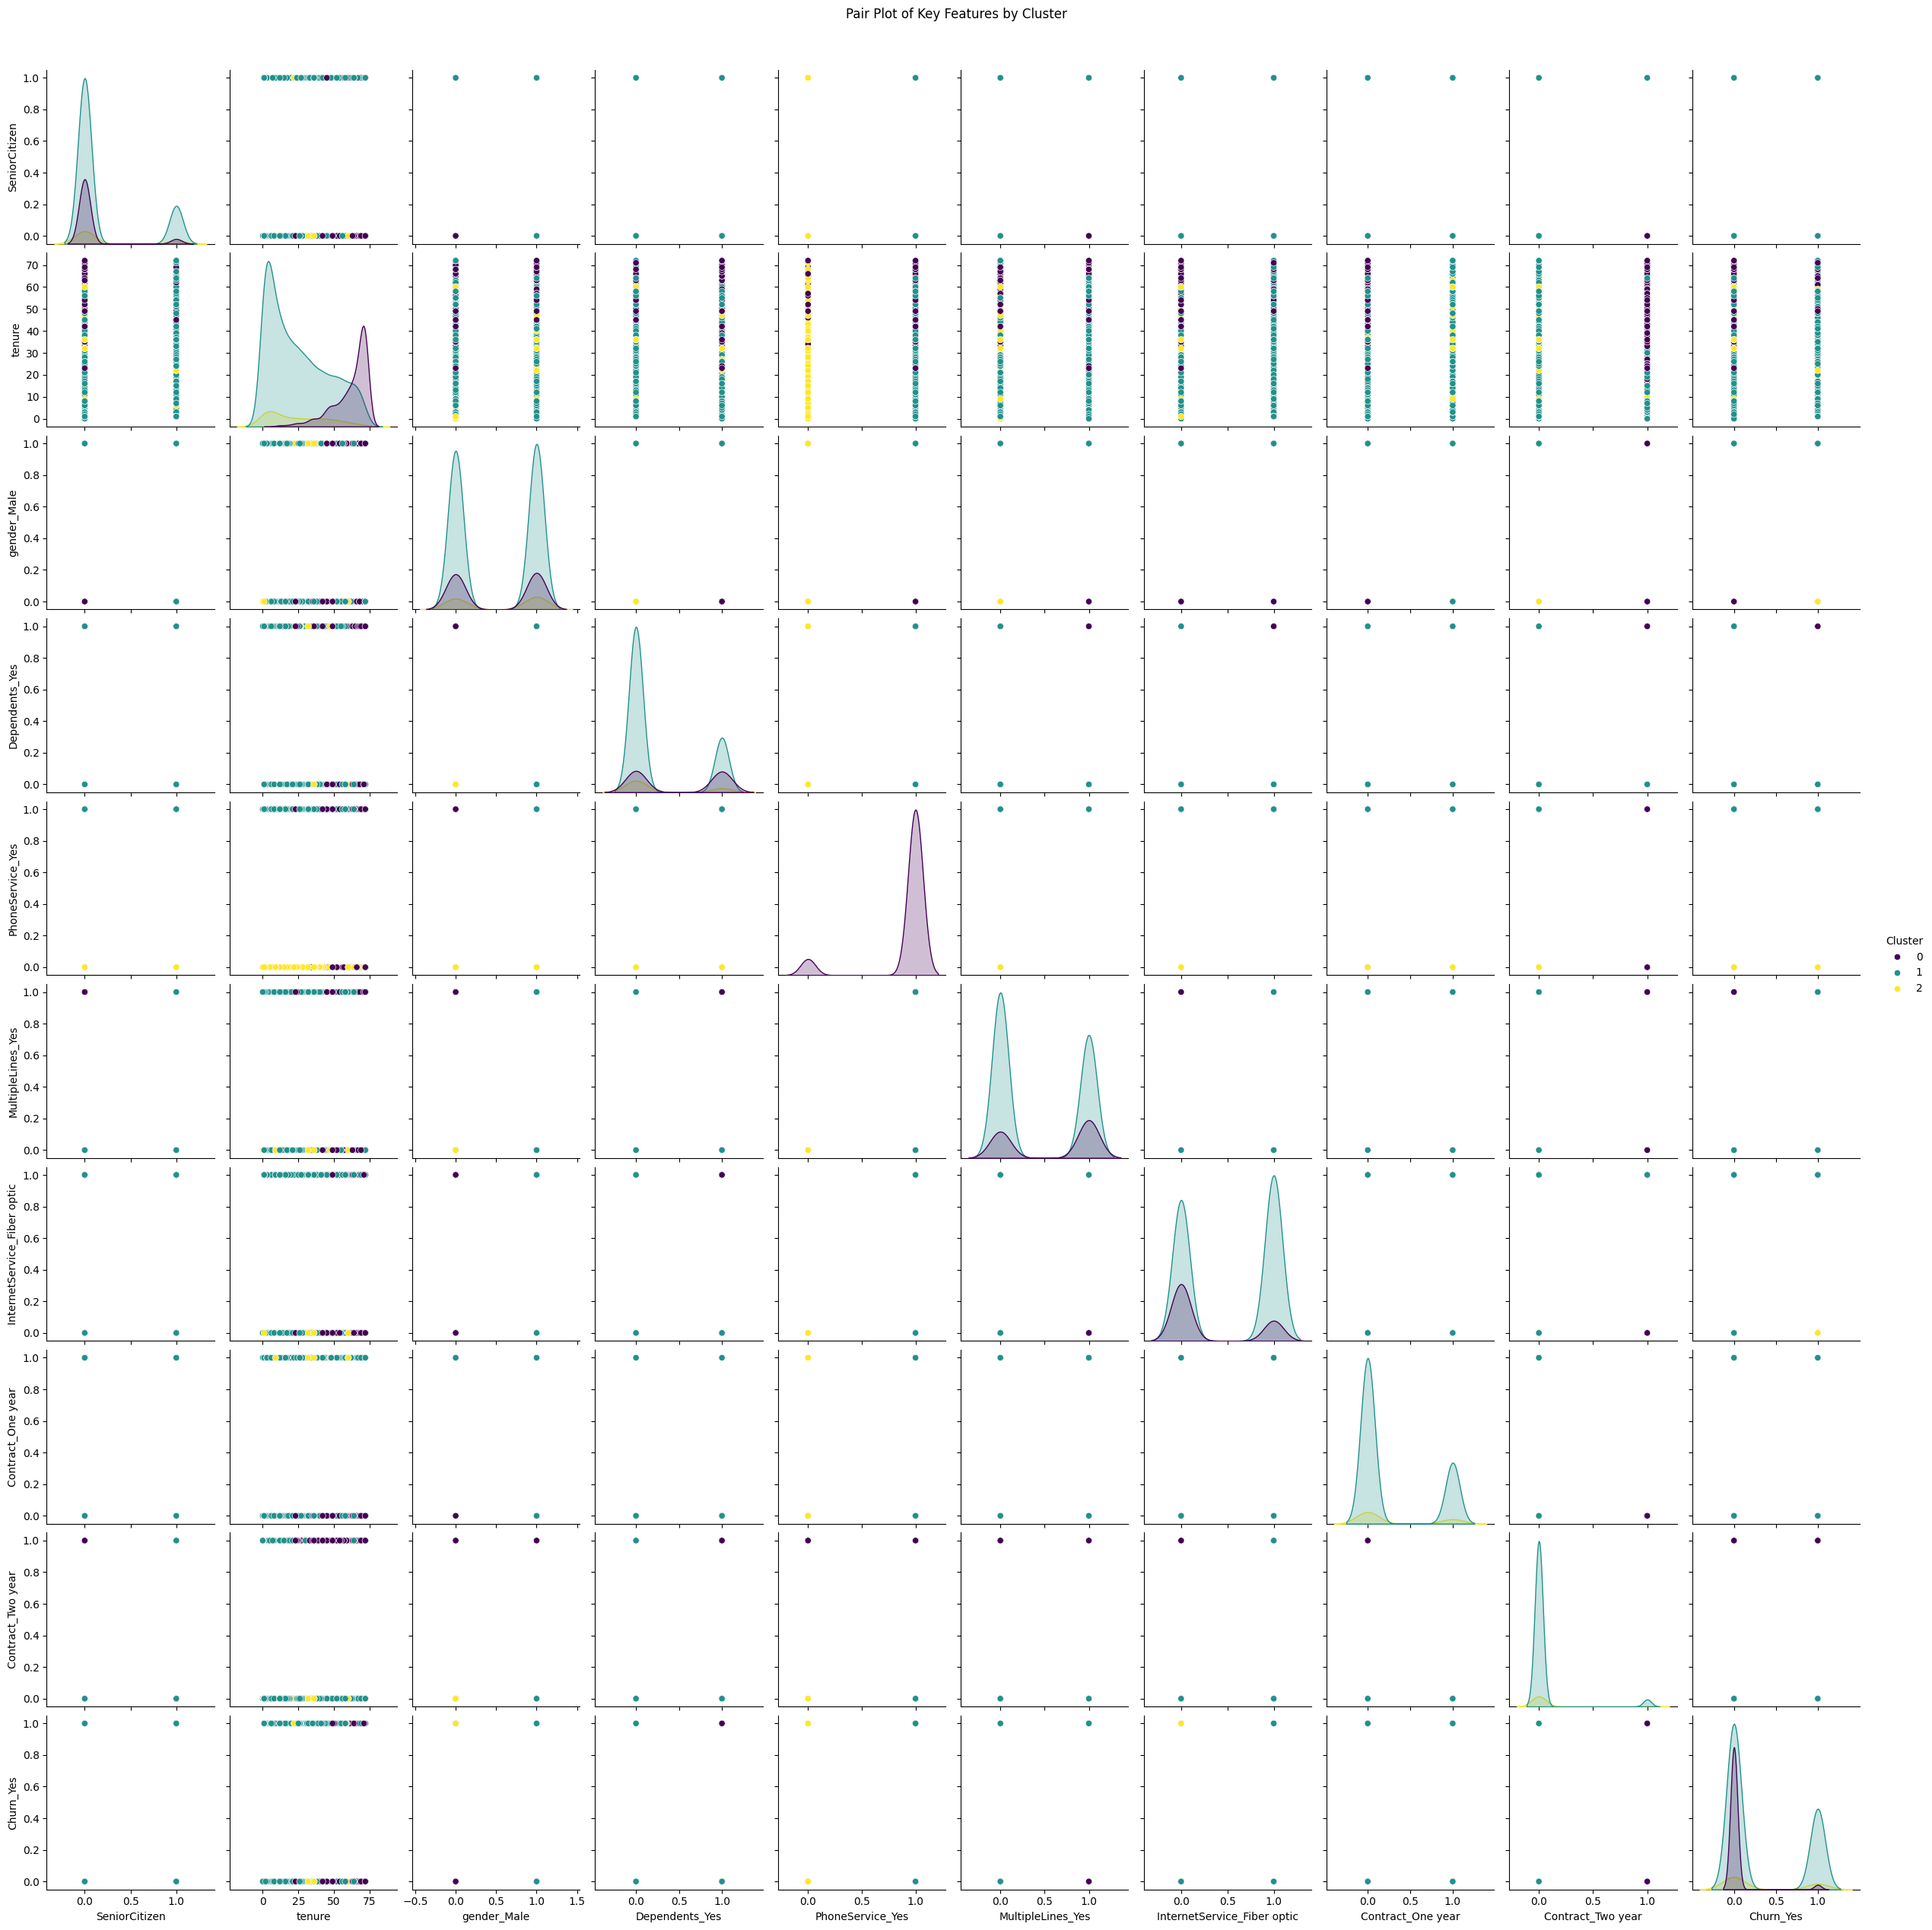

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot of the key features colored by cluster
sns.pairplot(X_train_original_df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()


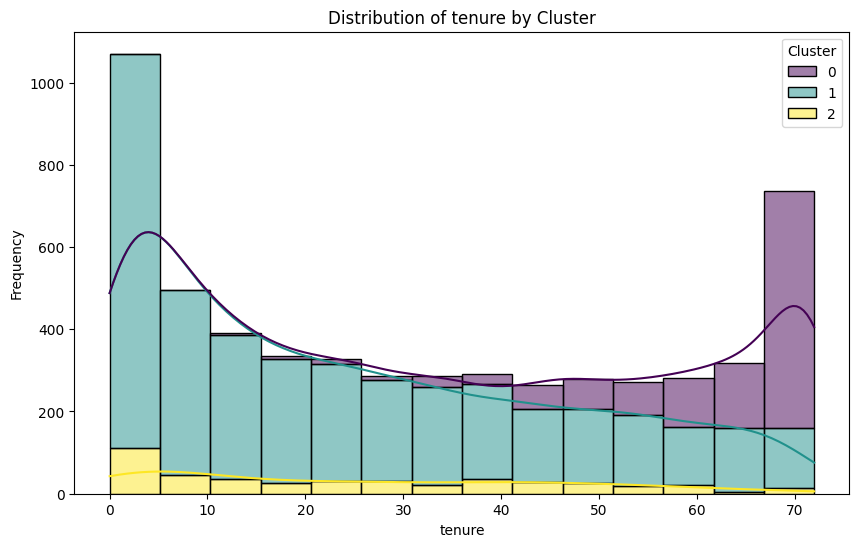

<Figure size 1000x600 with 0 Axes>

In [12]:
# List of key features to visualize
key_features = ['tenure', 'MonthlyCharges']  # Verify if 'MonthlyCharges' is the correct column name

for feature in key_features:
    plt.figure(figsize=(10, 6))
    # Check if the feature exists in the DataFrame before plotting
    if feature in X_train_original_df.columns:
        sns.histplot(data=X_train_original_df, x=feature, hue='Cluster', multiple='stack', palette='viridis', kde=True)
        plt.title(f'Distribution of {feature} by Cluster')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame.")

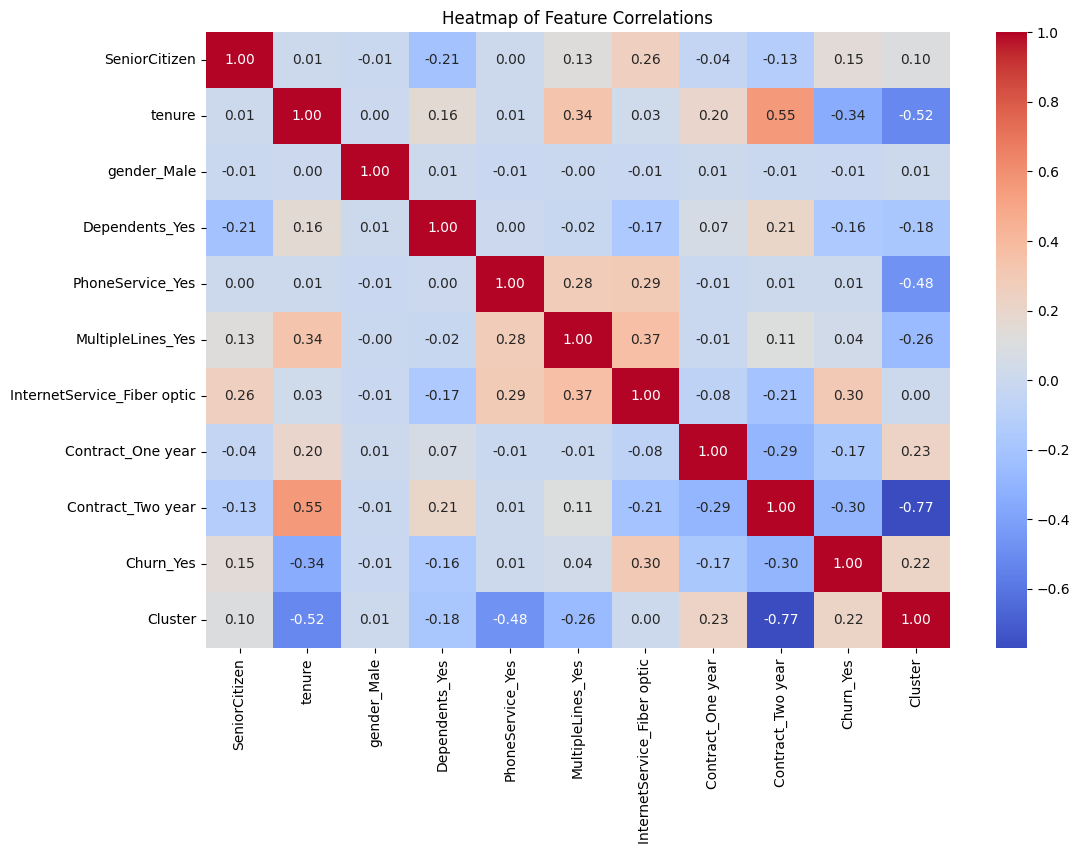

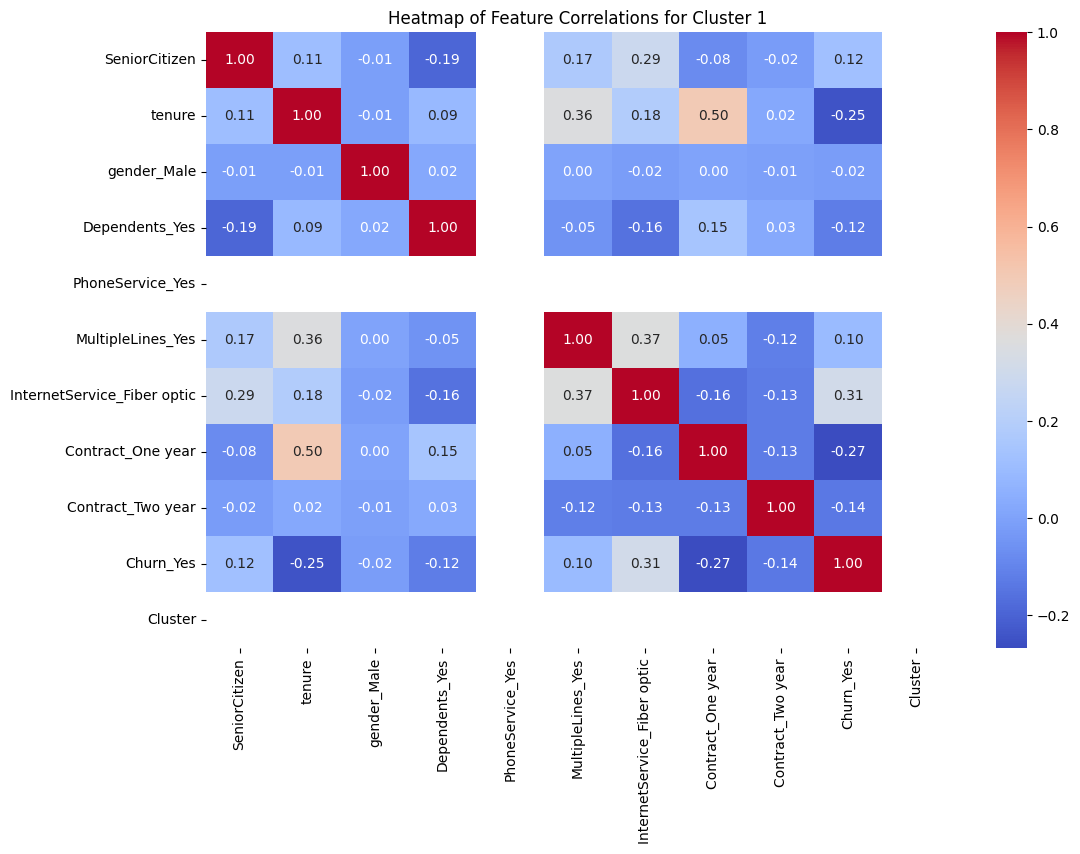

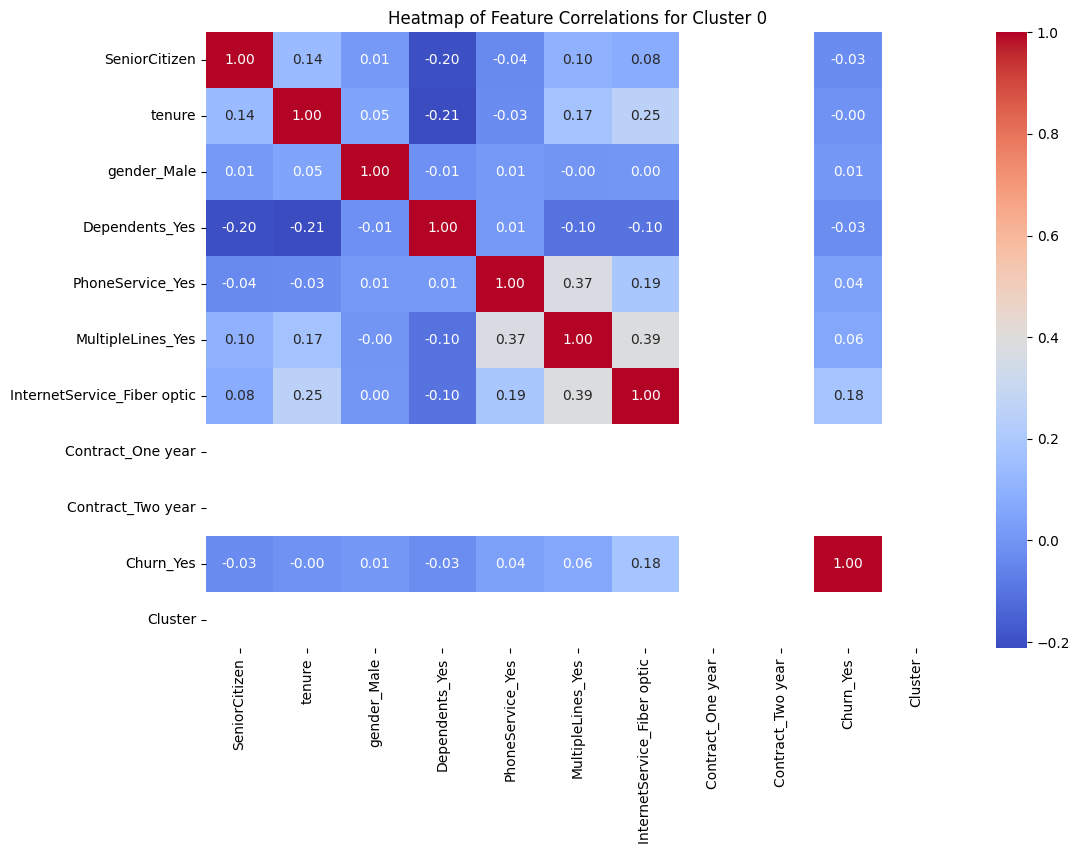

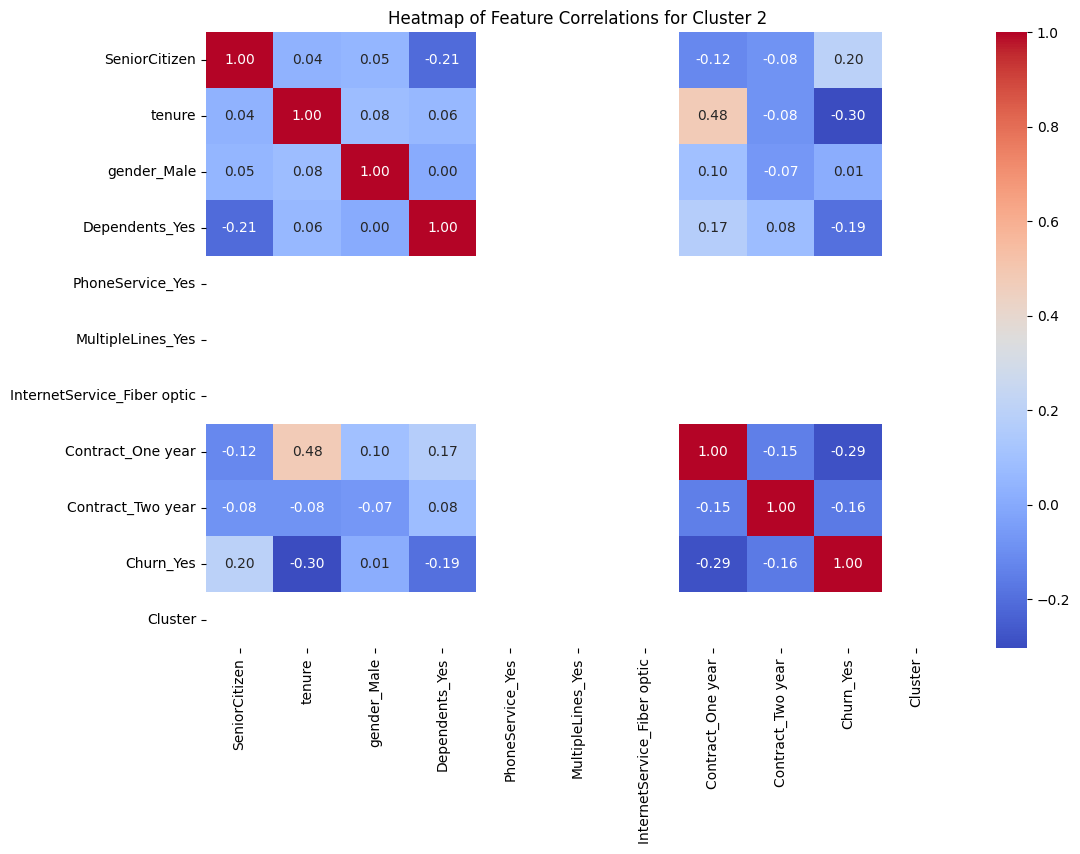

In [13]:
# Create a heatmap for the entire dataset to see the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_original_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

# Create heatmaps for each cluster to see the correlation within clusters
for cluster in X_train_original_df['Cluster'].unique():
    plt.figure(figsize=(12, 8))
    sns.heatmap(X_train_original_df[X_train_original_df['Cluster'] == cluster].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Heatmap of Feature Correlations for Cluster {cluster}')
    plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
dataset = pd.read_csv('Dataset (ATS)-1 (1).csv')
# Preprocessing
categorical_features = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract']
numeric_features = ['tenure', 'MonthlyCharges']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separate features and target variable
X = dataset.drop('Churn', axis=1)
y = dataset['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5687 - loss: 0.6496 - val_accuracy: 0.7986 - val_loss: 0.4262
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4450 - val_accuracy: 0.8021 - val_loss: 0.4160
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.4375 - val_accuracy: 0.7968 - val_loss: 0.4140
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7944 - loss: 0.4328 - val_accuracy: 0.8057 - val_loss: 0.4101
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7877 - loss: 0.4332 - val_accuracy: 0.8057 - val_loss: 0.4086
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7993 - loss: 0.4232 - val_accuracy: 0.8066 - val_loss: 0.4106
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - loss: 0.4255 - val_accuracy: 0.8021 - val_loss: 0.4091
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.4309 - val_accuracy: 0.7959 - val_

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict churn on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

print(classification_report_output)
print(confusion_matrix_output)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

[[966  70]
 [214 159]]


Class Weights: {0: 0.679583835946924, 1: 1.8921074727120066}
X_train_sub shape: (4507, 10)
y_train_sub shape: (4507,)
X_val shape: (1127, 10)
y_val shape: (1127,)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4313 - loss: 1.5341 - val_accuracy: 0.5909 - val_loss: 1.2254
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4953 - loss: 1.3818 - val_accuracy: 0.8554 - val_loss: 1.1310
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5498 - loss: 1.2682 - val_accuracy: 0.9281 - val_loss: 1.0552
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6053 - loss: 1.1801 - val_accuracy: 0.9299 - val_loss: 0.9927
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6474 - loss: 1.1010 - val_accuracy: 0.9326 - val_loss: 0.9361
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - loss: 1.0378 - val_accuracy: 0.9326 - val_loss: 0.8824
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7252 - loss: 0.9927 - val_accuracy: 0.9326 - val_loss: 0.8309
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7682 - loss: 0.9283 - val_accuracy: 0.9468 - val_

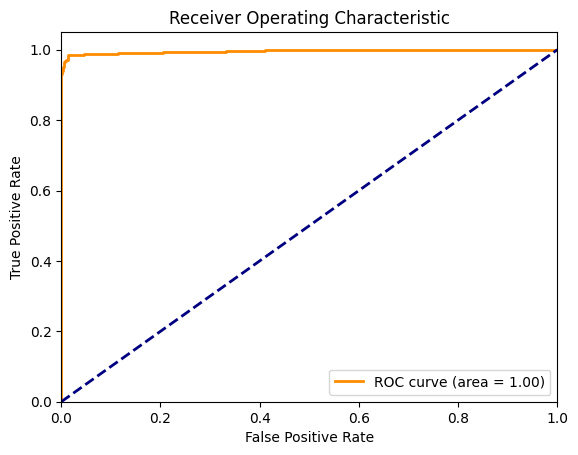

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2
import numpy as np

# Define the architecture of the improved ANN model with L2 regularization and increased dropout rates
def build_ann(input_dim):
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.7))

    # # Second hidden layer
    # model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    # model.add(Dropout(0.7))

    # Third hidden layer
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.7))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Example usage
input_dim = X_train_scaled.shape[1]
ann_model = build_ann(input_dim)

# Split the training data into training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_sub), y=y_train_sub)
class_weights_dict = dict(enumerate(class_weights))

# Print class weights to debug
print("Class Weights:", class_weights_dict)

# Verify data shapes
print(f'X_train_sub shape: {X_train_sub.shape}')
print(f'y_train_sub shape: {y_train_sub.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

# Train the model with class weights and early stopping
history = ann_model.fit(X_train_sub, y_train_sub, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Predict customer churn
y_pred_proba = ann_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
